# Sprint #2 Acamica -- Proyecto Inmobiliario

In [1]:
import warnings
warnings.filterwarnings('ignore')
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv

In [2]:
df = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
df.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


## Iniciamos nuestra exploracion de datos

Primero, observamos como esta construido nuestro Dataset. Pandas profilling automatiza gran parte de la tarea.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)



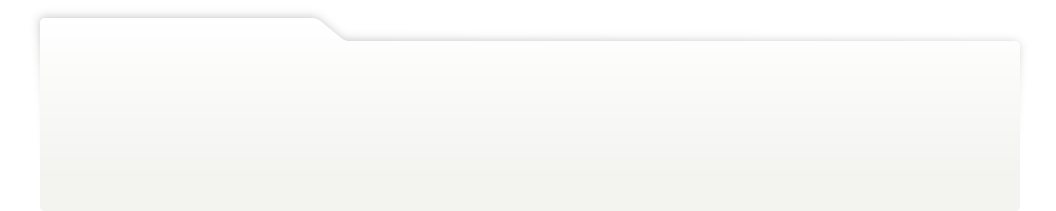
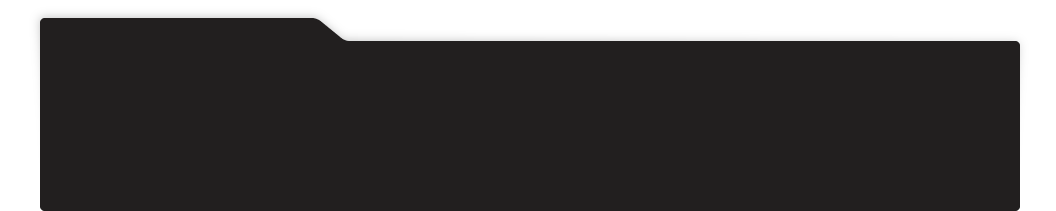
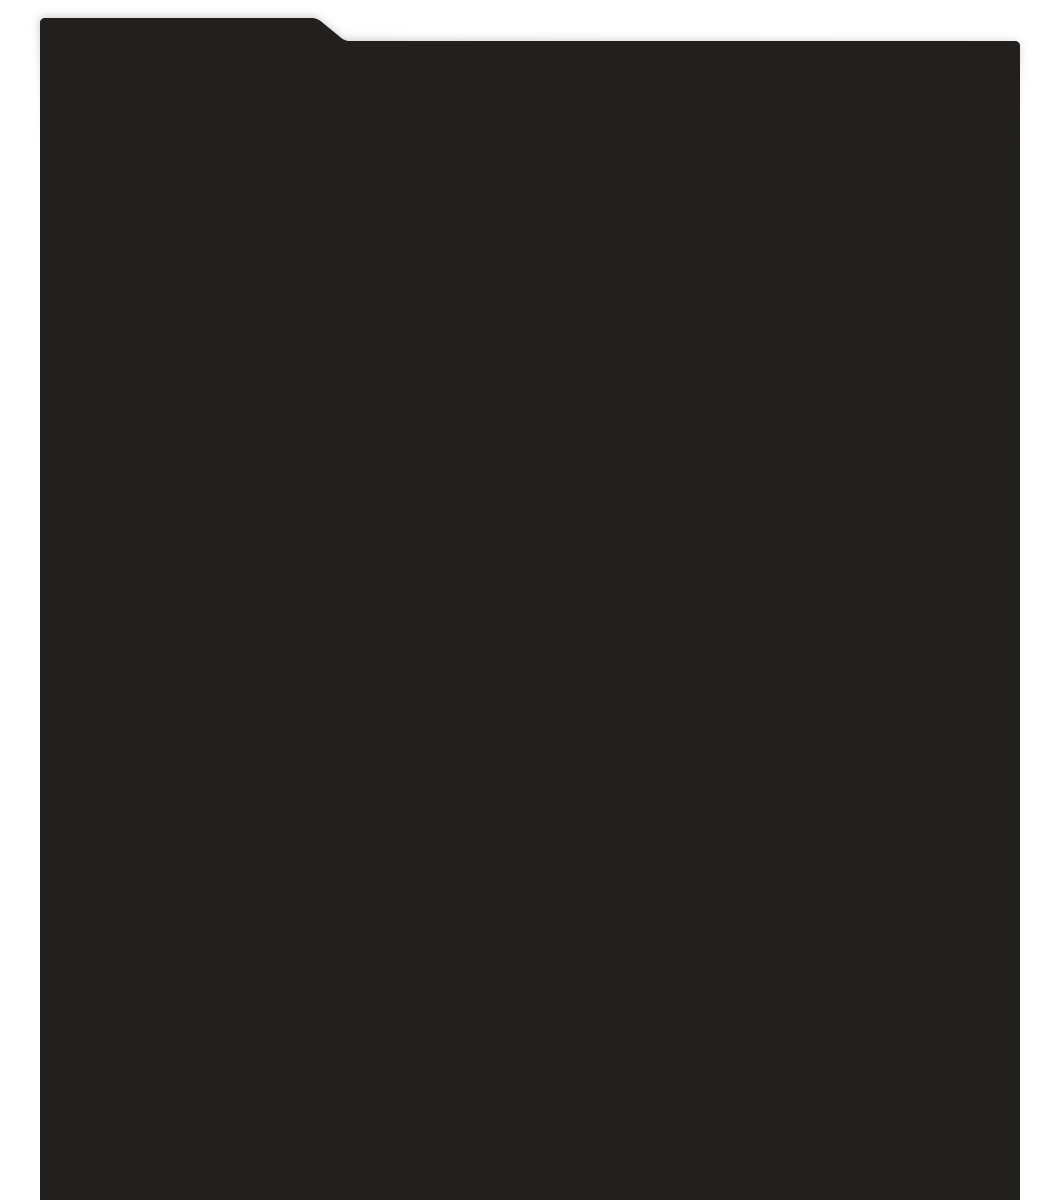
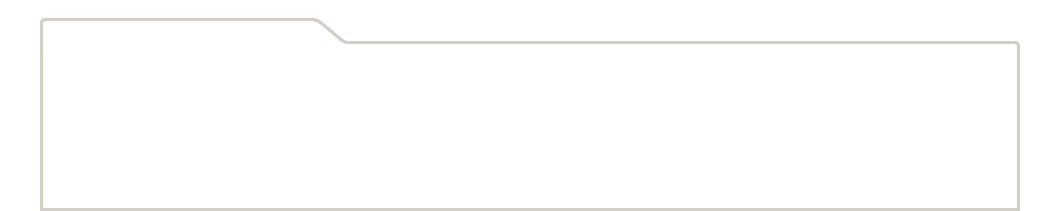
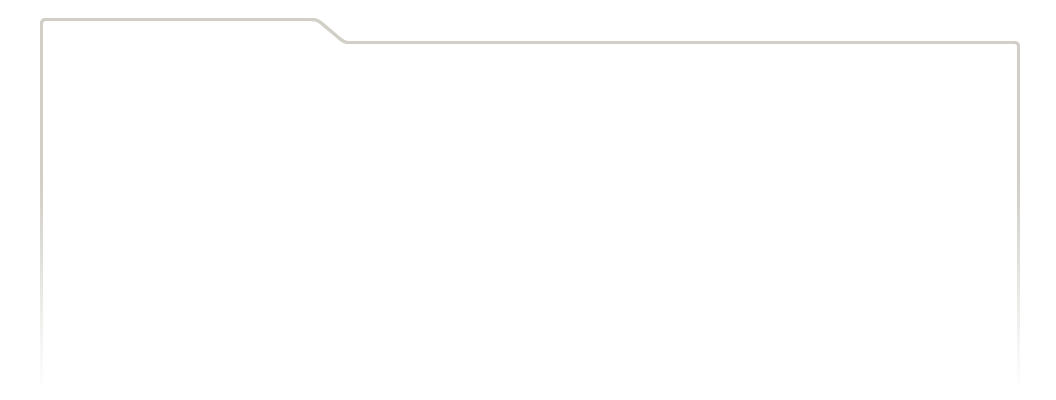
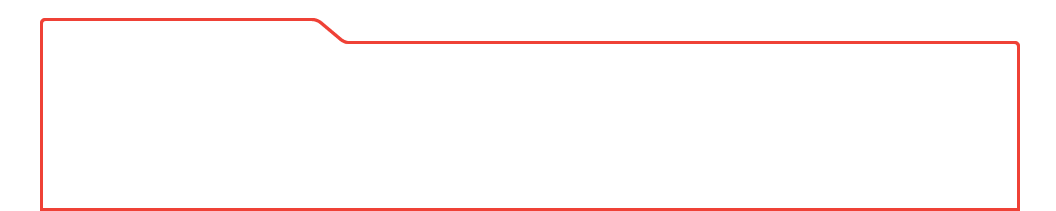
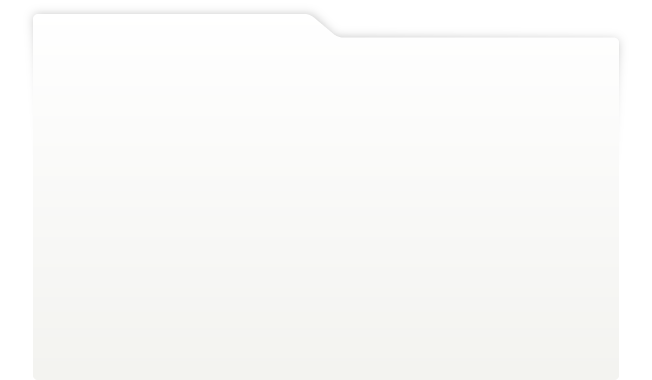
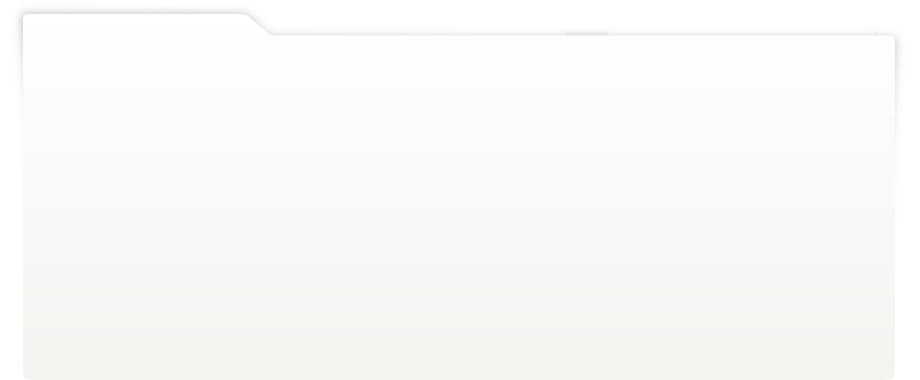
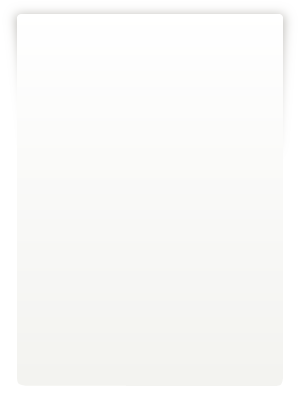
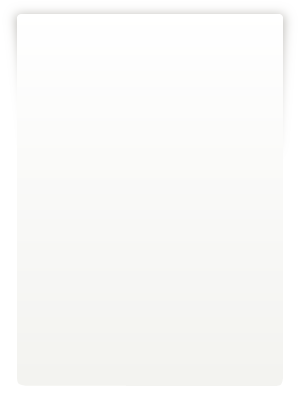
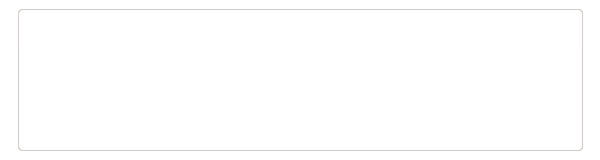
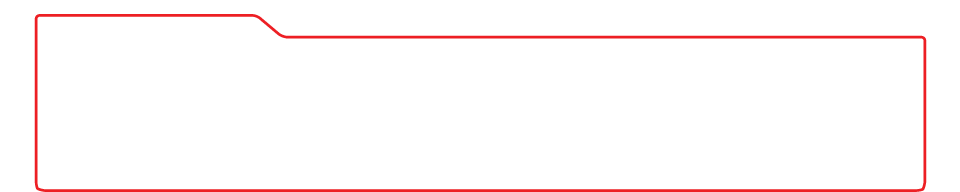
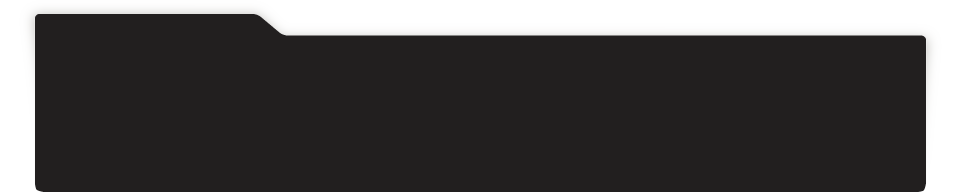
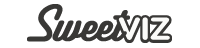
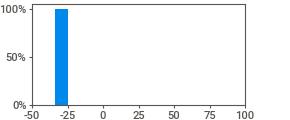
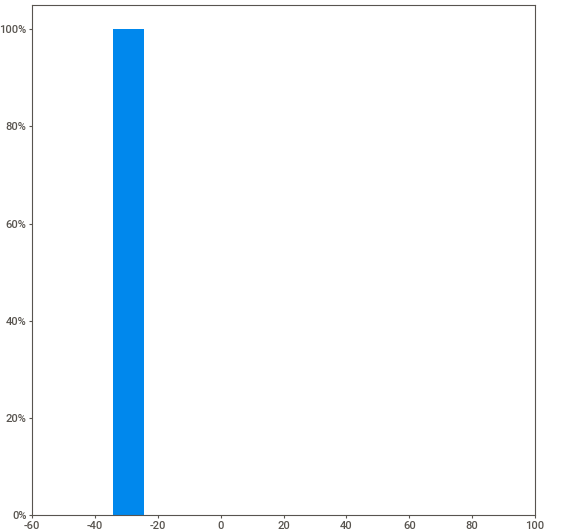
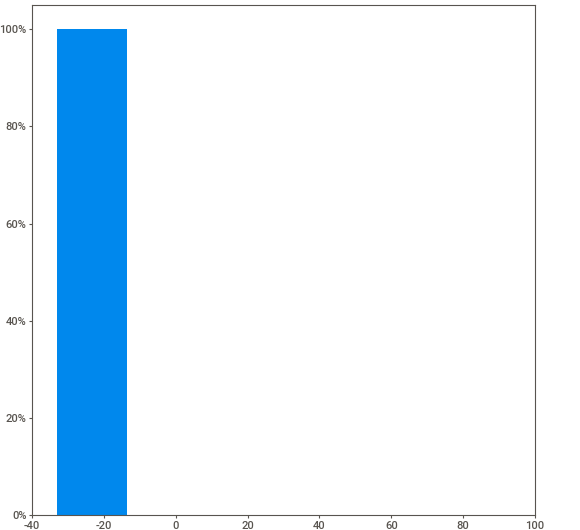
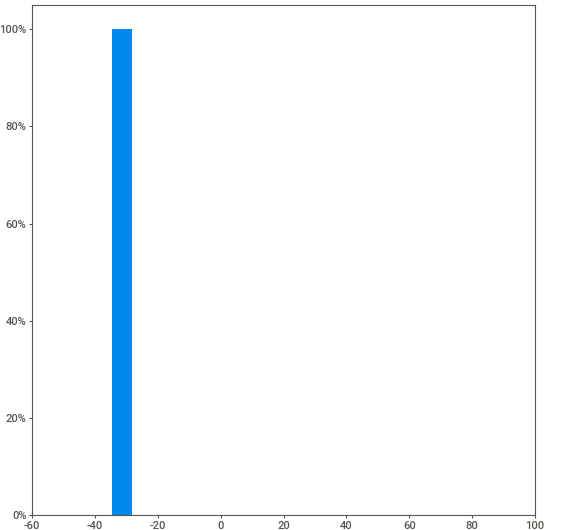
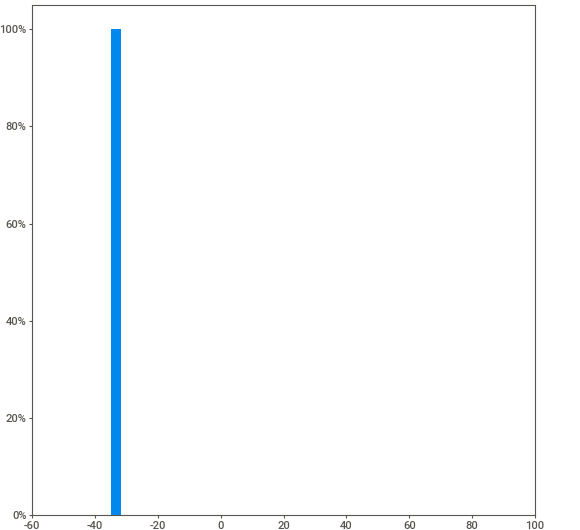
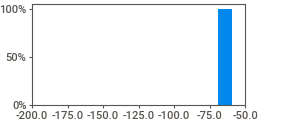
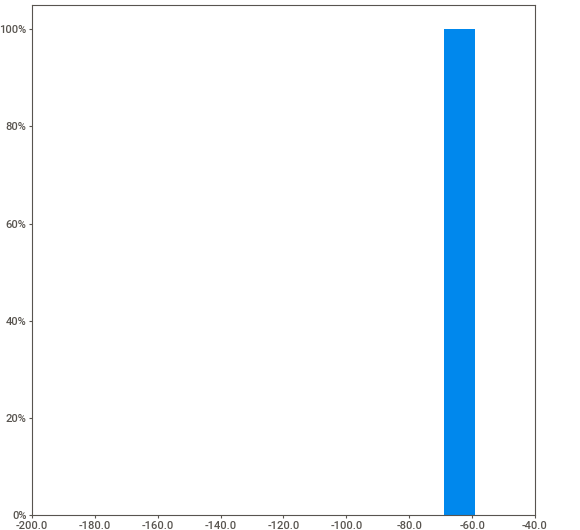
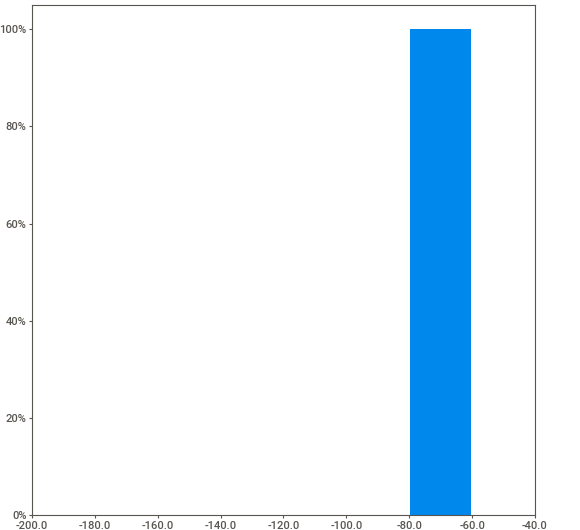
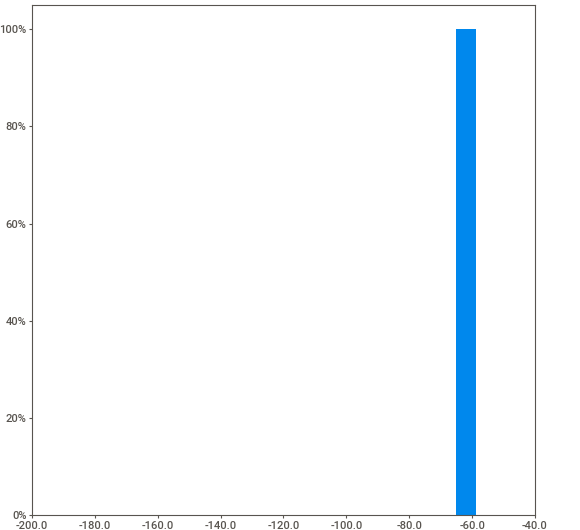
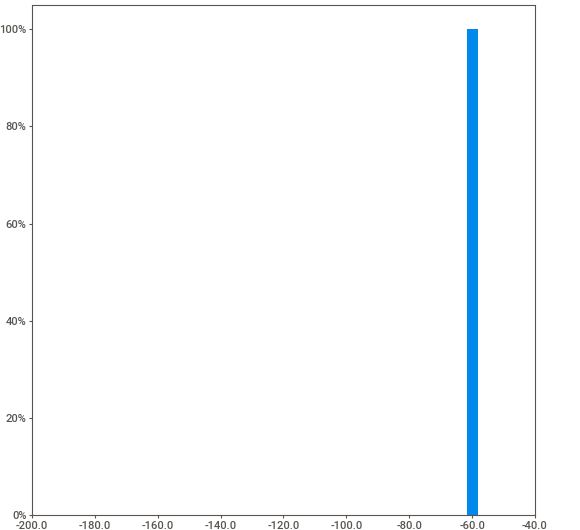
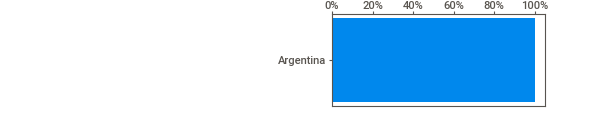
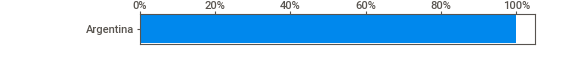
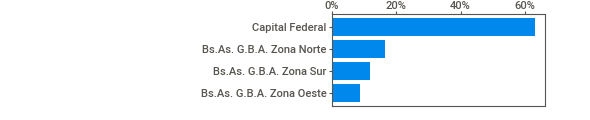
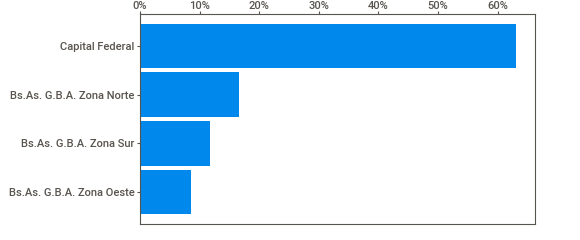
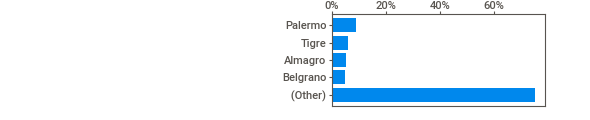
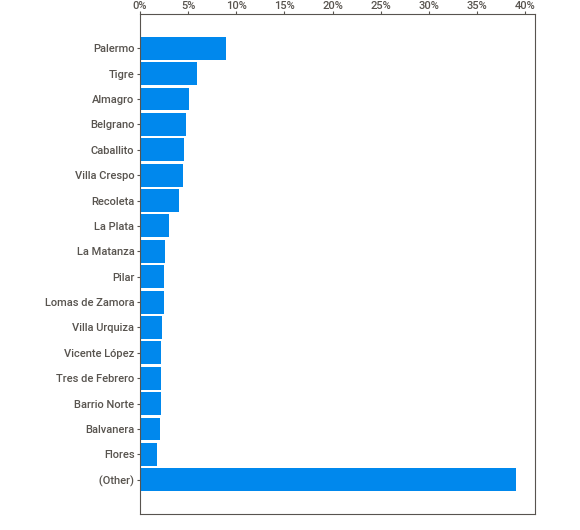
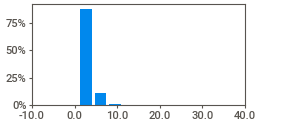
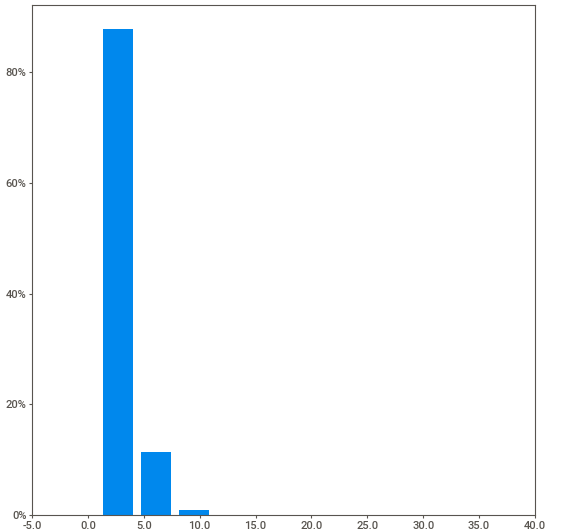
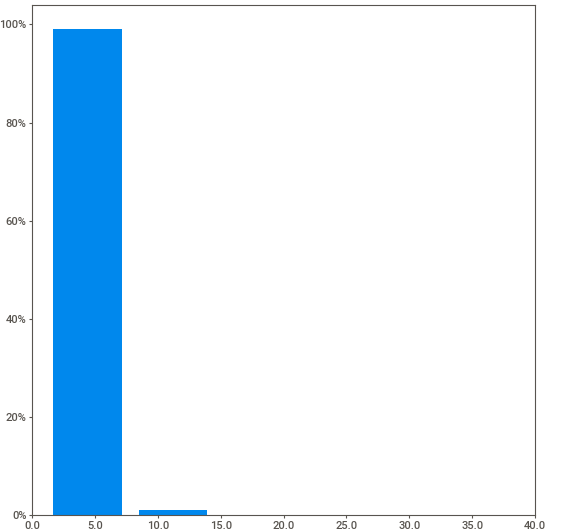
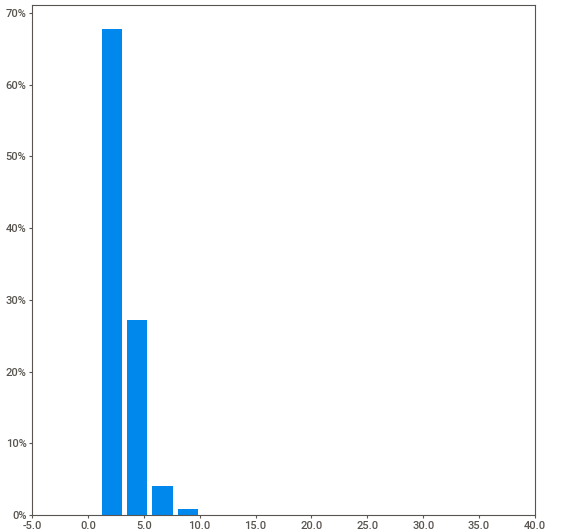
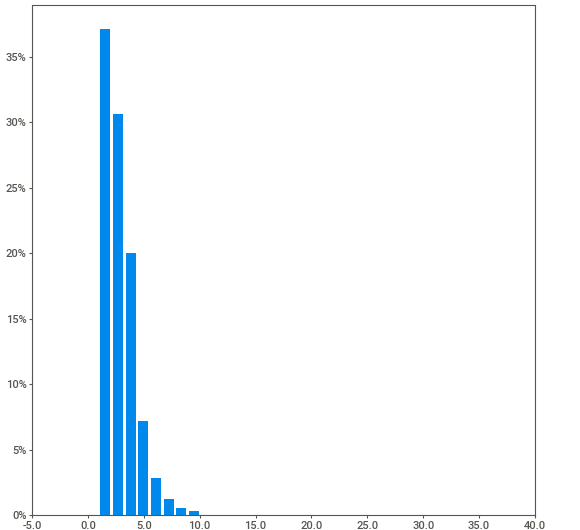
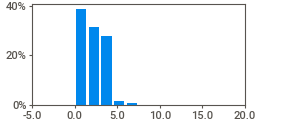
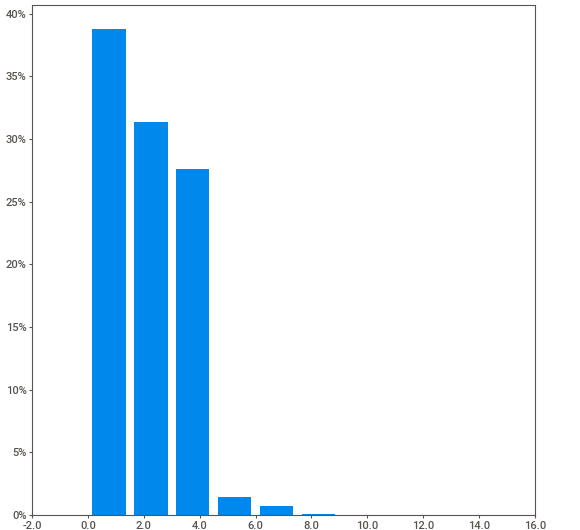
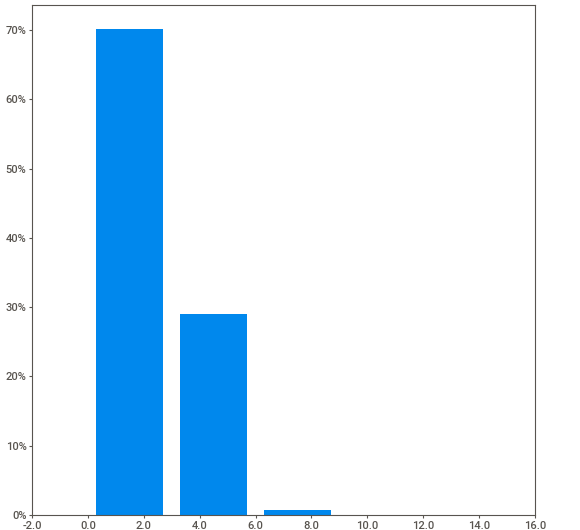
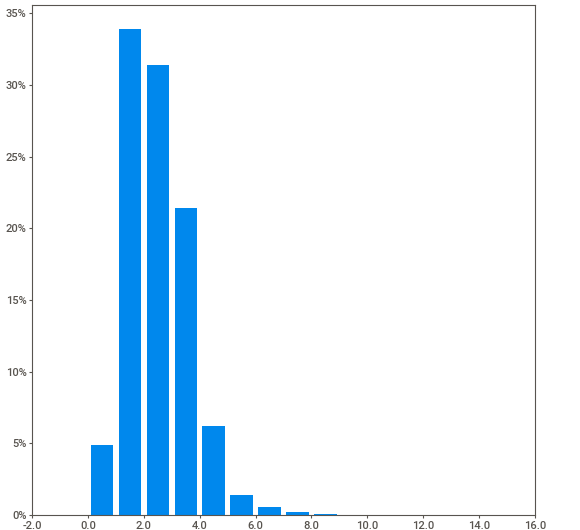
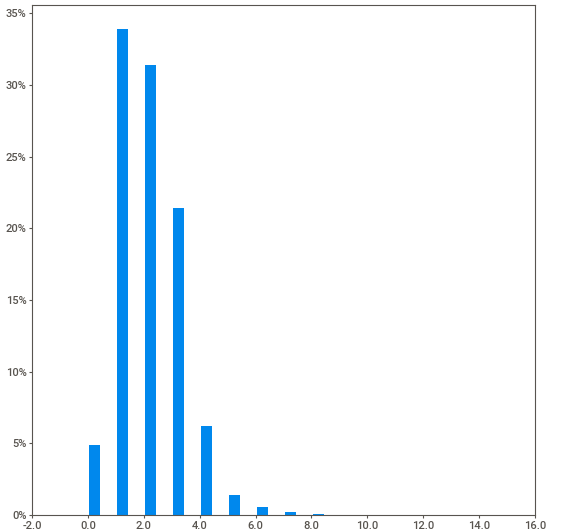
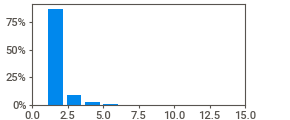
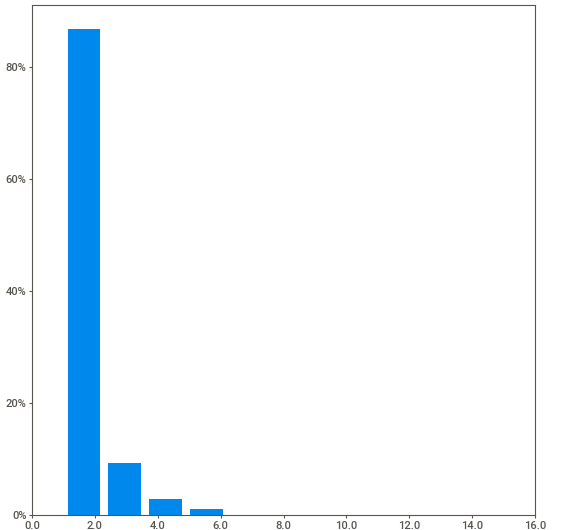
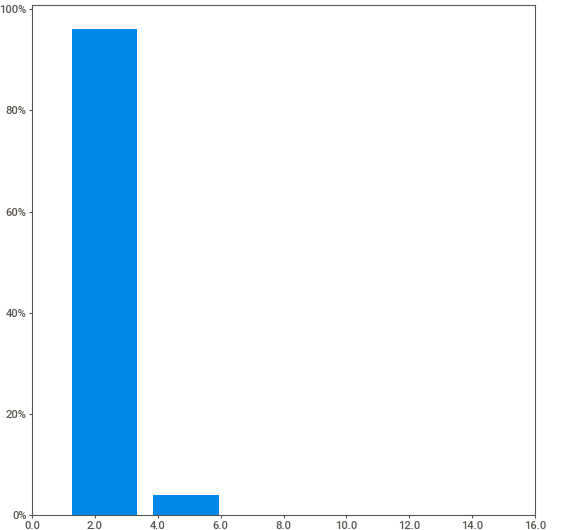
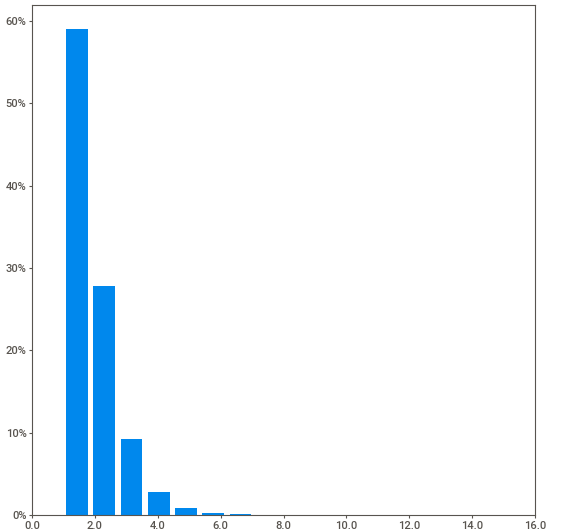
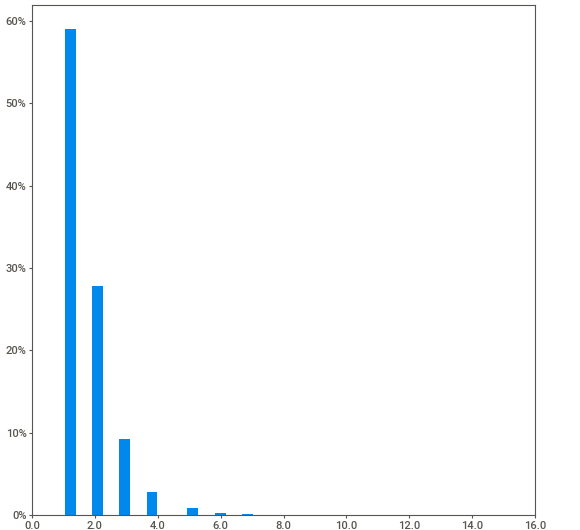
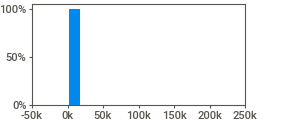
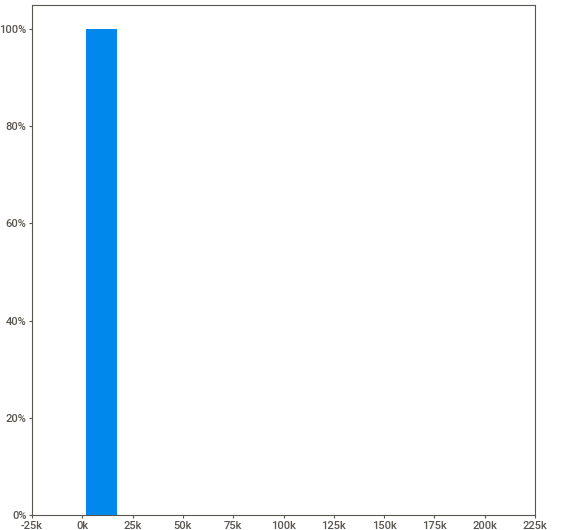
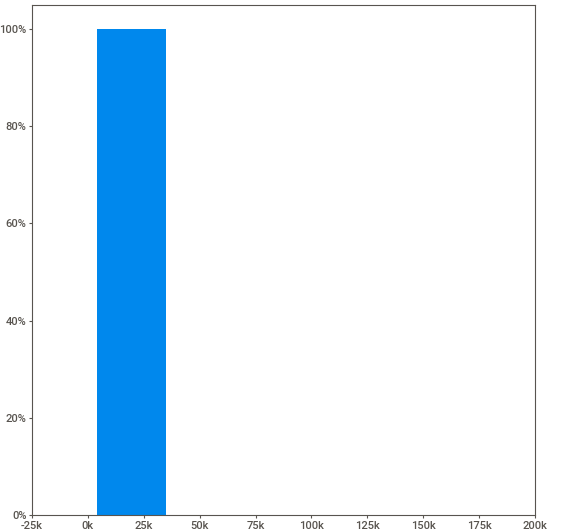
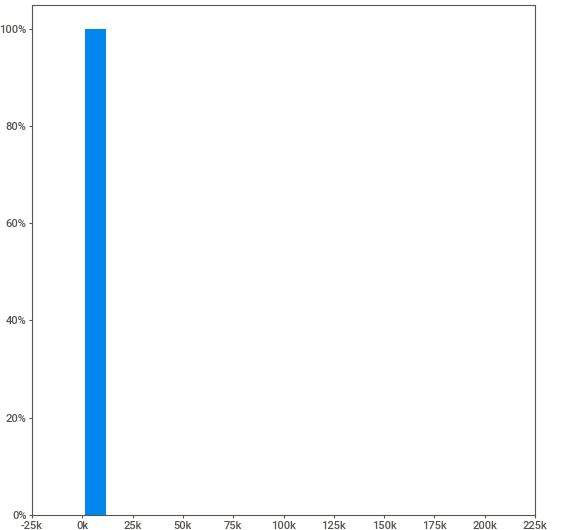
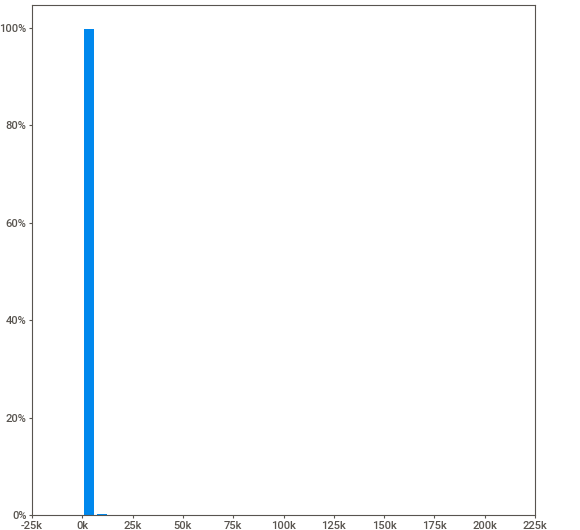
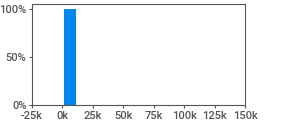
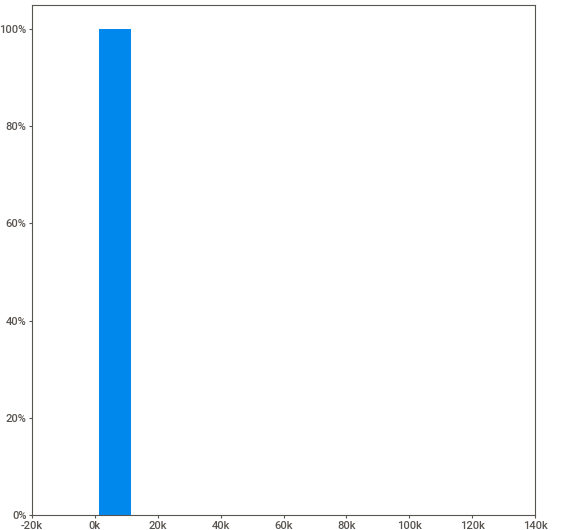
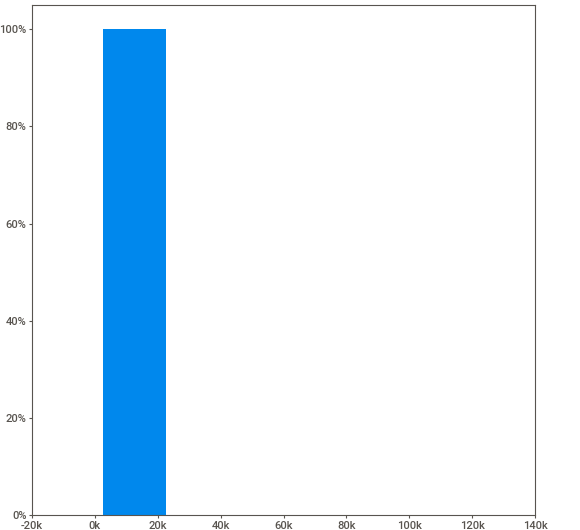
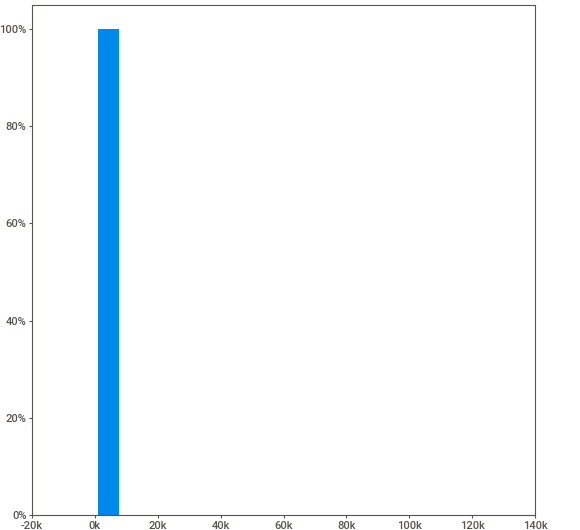
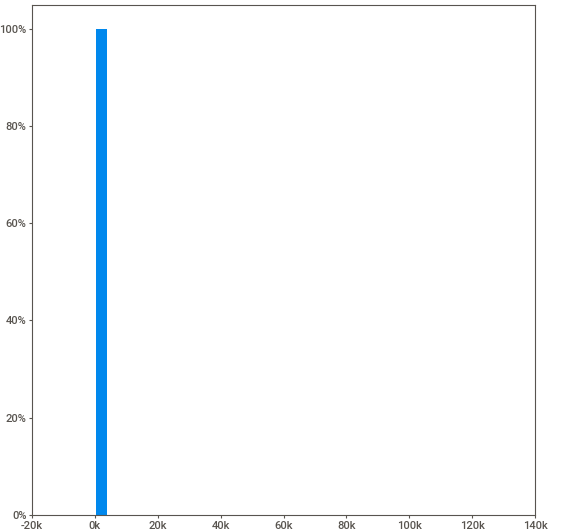
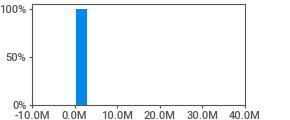
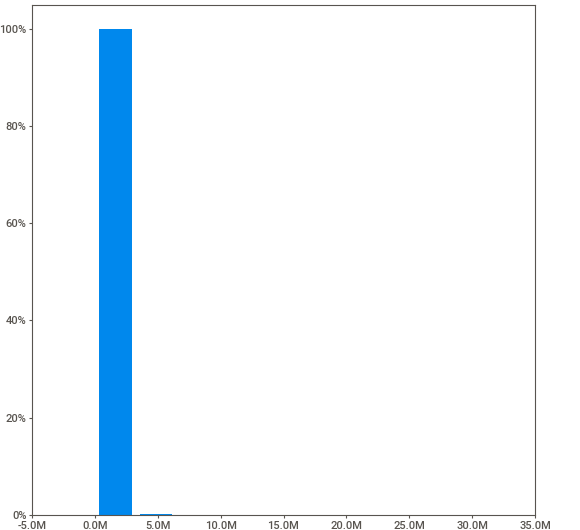
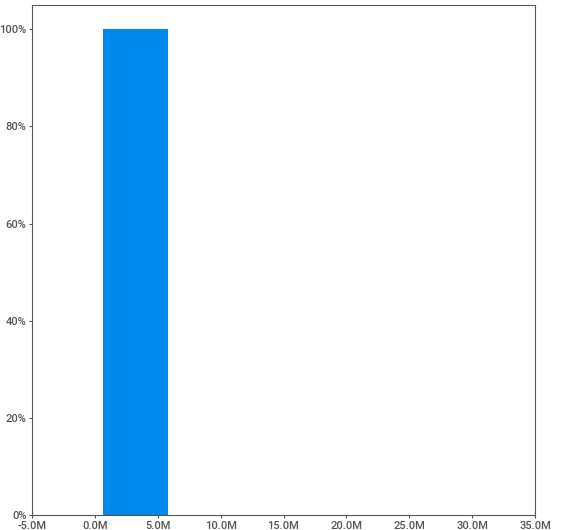
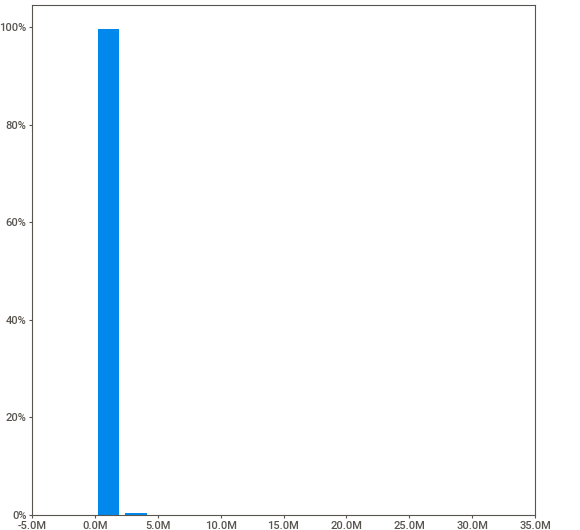
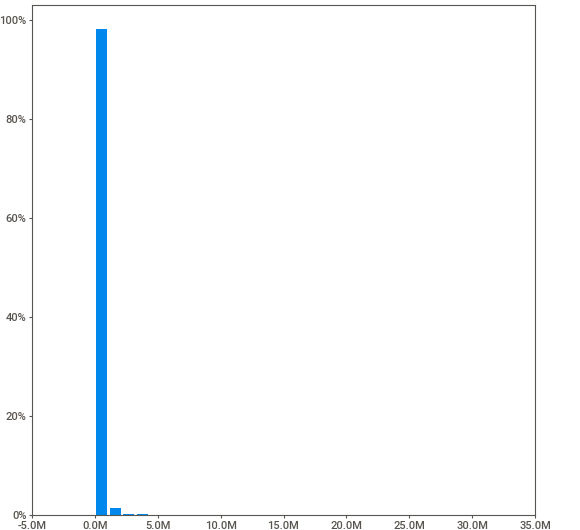
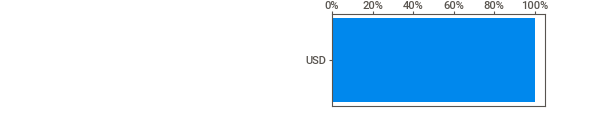
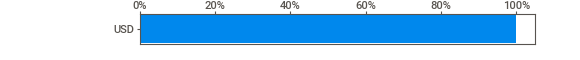
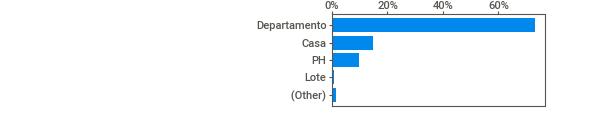
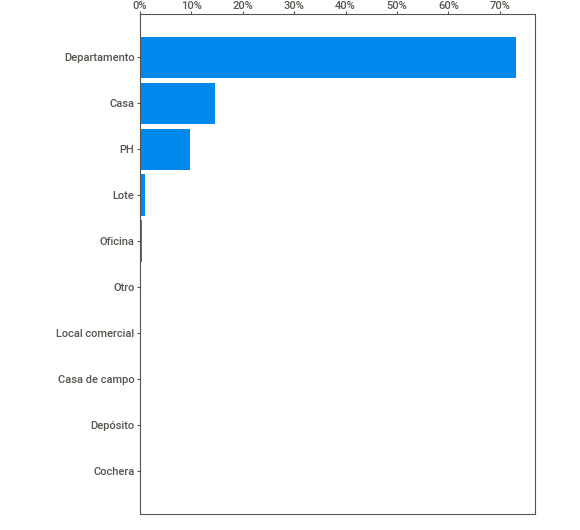
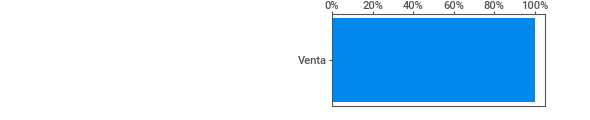
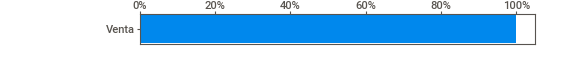
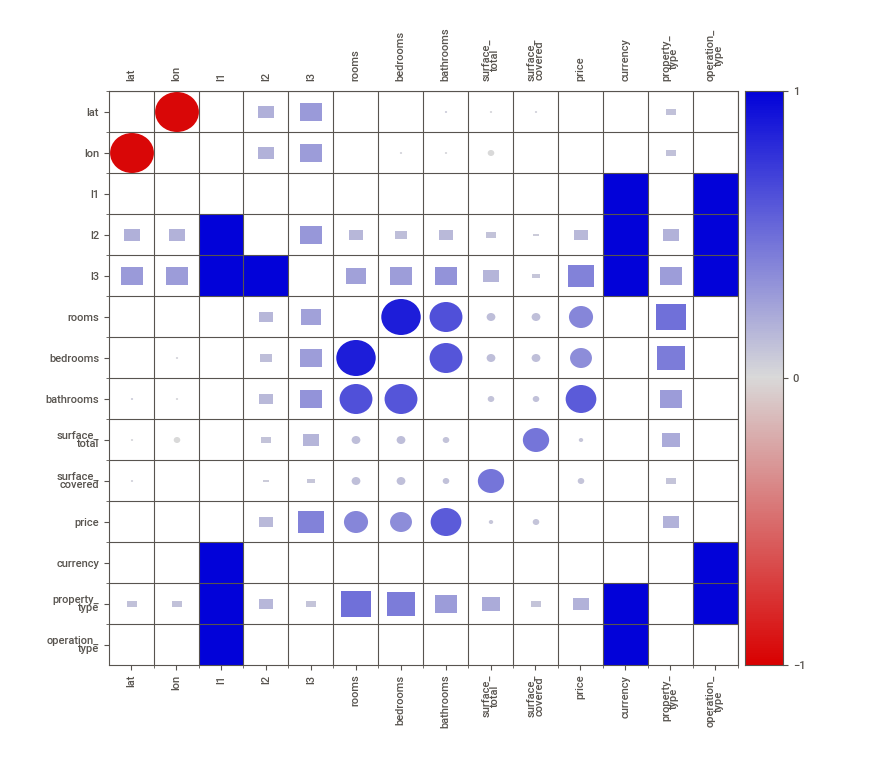
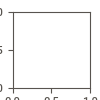

In [4]:
my_report = sv.analyze(df)
my_report.show_notebook()

## Despues de visualizar cada variable:

Decidimos cuales variables no nos interesan, o que pueden  estar representadas por otras variables.

Al igual que en el Sprint 1: decidimos que algunas variables importantes para la prediccion del precio de la casa son principalmente: La ubicacion, el tamaño, habitaciones/baños y por ultimo el tipo de propiedad.

Tambien podemos visualizar cuales son las variables con el mayor numero de datos nulos.

In [5]:
non_interesting = ['start_date',
                  'end_date',
                  'created_on',
                  'l1',
                  'l2',
                  'currency',
                  'title',
                  'description',
                  'operation_type']

df.drop(columns = non_interesting, inplace = True)

Eliminamos las variables a las cuales no les vemos valor, o que las vemos representadas por otras.

<AxesSubplot:>

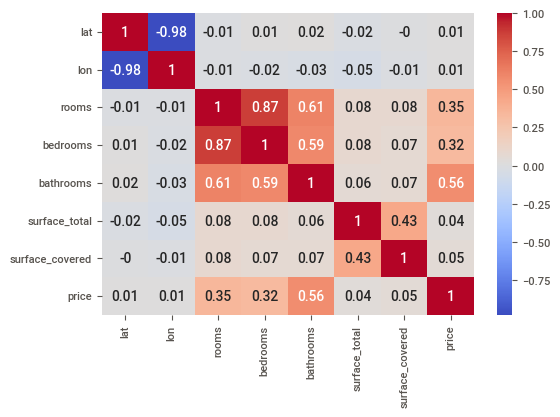

In [6]:
sns.heatmap(df.corr().round(2), annot = True, cmap = 'coolwarm')

Verificamos las correlaciones para concluir que variables nos pueden ayudar a predecir aquellas con valores faltantes.

In [7]:
df[df.lat.isnull()]

,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
17,NaN,NaN,Tigre,2.0,1.0,1.0,53.0,42.0,145000.0,Departamento
26,NaN,NaN,Morón,2.0,1.0,1.0,45.0,45.0,110000.0,Departamento
35,NaN,NaN,Palermo,2.0,1.0,2.0,81.0,76.0,410000.0,Departamento
36,NaN,NaN,Palermo,2.0,1.0,1.0,42.0,38.0,169000.0,Departamento
46,NaN,NaN,Palermo,2.0,1.0,1.0,52.0,46.0,159500.0,Departamento
...,...,...,...,...,...,...,...,...,...,...
146571,NaN,NaN,Tigre,2.0,1.0,2.0,57.0,46.0,120000.0,Departamento
146575,NaN,NaN,Tigre,2.0,1.0,2.0,64.0,56.0,141000.0,Departamento
146577,NaN,NaN,Tigre,3.0,2.0,2.0,89.0,71.0,167000.0,Departamento
146578,NaN,NaN,Tigre,3.0,2.0,2.0,89.0,71.0,167000.0,Departamento


Observamos que en gran manera los datos que les falta lat, tambien les falta lon, vamos a verificar en la siguiente celda.

In [8]:
df[df.lat.isnull() & df.lon.isnull()].shape[0] / df.lat.isnull().sum()

1.0

In [9]:
df.lat.isnull().sum() / df.shape[0]

0.06767353061502795

Para que no haya data leakage, de una vez separamos nuestro Train set y nuestro Test set.

In [10]:
from sklearn.model_selection import train_test_split

y = df.price.copy()
X = df.drop(columns = 'price').copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Vamos a remplazar nuestros valores que faltan de lon y lat dependiendo de la media de estos para cada barrio. Nos dara unas coordenadas no muy alejadas de la realidad.

In [11]:
barrios = X_train.groupby('l3').agg('mean')[['lon', 'lat']]
barrios

,lon,lat
l3,,
Abasto,-58.412078,-34.603921
Agronomía,-58.490098,-34.593935
Almagro,-58.421611,-34.605747
Almirante Brown,-58.388359,-34.813652
Avellaneda,-58.345344,-34.683075
...,...,...
Villa Riachuelo,-58.472775,-34.690259
Villa Santa Rita,-58.481693,-34.615209
Villa Soldati,-58.442334,-34.660863


In [12]:
X_train.loc[X_train.lat.isnull(), 'lat'] = X_train['l3'].map(barrios.lat)
X_train.loc[X_train.lon.isnull(), 'lon'] = X_train['l3'].map(barrios.lon)



In [13]:
X_train[X_train.lon.isnull()]

,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type


In [14]:
X_train[X_train.bathrooms.isnull()]

,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type
29009,-34.598119,-58.387780,Recoleta,3.0,2.0,NaN,NaN,NaN,Departamento
116349,-34.622510,-58.396630,San Cristobal,3.0,2.0,NaN,NaN,NaN,Departamento
58012,-34.550414,-58.697472,San Miguel,1.0,0.0,NaN,NaN,NaN,Departamento
12253,-34.579134,-58.475520,Villa Urquiza,1.0,1.0,NaN,34.0,34.0,Departamento
98250,-34.712672,-58.410550,Lanús,1.0,0.0,NaN,NaN,NaN,Depósito
...,...,...,...,...,...,...,...,...,...
48984,-34.332007,-58.743775,Escobar,1.0,1.0,NaN,808.0,NaN,Lote
12185,-34.619127,-58.497814,Monte Castro,4.0,3.0,NaN,NaN,NaN,Departamento
124358,-34.760820,-58.399601,Lomas de Zamora,1.0,0.0,NaN,NaN,NaN,Oficina
124243,-34.816553,-58.395830,Almirante Brown,1.0,0.0,NaN,NaN,NaN,Otro


In [15]:
surface_tot = X_train.groupby('property_type').agg('mean')['surface_total'].round(0)
surface_cov = X_train.groupby('property_type').agg('mean')['surface_total'].round(0)

Para aquellos valores que nos faltan de surface_total los vamos a remplazar por la media de su respectivo tipo de propiedad.

In [16]:
X_train.surface_total.isnull().groupby(X_train['property_type']).sum()

property_type
Casa                3936
Casa de campo         54
Cochera              218
Departamento       10919
Depósito             195
Local comercial      244
Lote                 483
Oficina              212
Otro                 129
PH                   111
Name: surface_total, dtype: int64

In [17]:
X_train.loc[X_train.surface_total.isnull(), 'surface_total'] = X_train.property_type.map(surface_tot).round(0)
X_train.loc[X_train.surface_covered.isnull(), 'surface_covered'] = X_train.property_type.map(surface_cov).round(0)

In [18]:
X_test.loc[X_test.surface_total.isnull(), 'surface_total'] = X_test.property_type.map(surface_tot)
X_test.loc[X_test.surface_covered.isnull(), 'surface_covered'] = X_test.property_type.map(surface_cov)

En cuanto a el numero de baños, llenamos los valores nulos en base a un arbol regresor a partir de los valores de rooms y bedrooms.

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

bath = DecisionTreeClassifier(random_state = 42)
bath.fit(X_train[~ X_train.bathrooms.isnull()][['rooms', 'bedrooms']], 
         X_train[~ X_train.bathrooms.isnull()]['bathrooms'])

DecisionTreeClassifier(random_state=42)

In [20]:
X_train.loc[X_train.bathrooms.isnull(), 'bathrooms'] = bath.predict(X_train[X_train.bathrooms.isnull()][['rooms', 'bedrooms']])

In [21]:
X_train.bathrooms.value_counts()

1.0     70250
2.0     32227
3.0     10380
4.0      3147
5.0       940
6.0       261
7.0        82
8.0        14
10.0        8
9.0         6
11.0        6
14.0        5
13.0        1
12.0        1
Name: bathrooms, dtype: int64

Eliminamos las columnas que ya no nos son utiles.

In [22]:
X_train.drop(columns = ['l3','property_type'], inplace = True)

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_train

array([[-0.09285719,  0.1007294 ,  0.65541763, ...,  0.47609893,
         0.02551749,  0.0031887 ],
       [ 0.00665949,  0.15542611, -0.05400089, ..., -0.66443102,
        -0.07455902, -0.08362024],
       [-0.09404568, -0.29463049,  0.65541763, ..., -0.66443102,
        -0.0578796 , -0.04503849],
       ...,
       [ 0.01695441,  0.07391094, -1.47283793, ..., -0.66443102,
        -0.11834249, -0.18489735],
       [-0.06850511, -0.31546122,  1.36483615, ...,  1.61662888,
        -0.02399953, -0.0209249 ],
       [ 0.03677317,  0.06663054, -1.47283793, ..., -0.66443102,
        -0.10166307, -0.14631559]])

Creamos un data pipeline para automatizar nuestro proceso. Creamos multiples pipelines con diferentes tipos de transformaciones por si creemos que una funciona mejor que otra. Por que no eliminamos outliers? Porque las predicciones sin outliers daban peores resultados, una lastima no haberlo incluido, sin embargo si se tuvo en cuenta.

In [24]:
def simple_pipeline(X):
    X.loc[X.lat.isnull(), 'lat'] = X['l3'].map(barrios.lat)
    X.loc[X.lon.isnull(), 'lon'] = X['l3'].map(barrios.lon)
    X.loc[X.surface_total.isnull(), 'surface_total'] = X.property_type.map(surface_tot).round(0)
    X.loc[X.surface_covered.isnull(), 'surface_covered'] = X.property_type.map(surface_cov).round(0)
    X.loc[X.bathrooms.isnull(), 'bathrooms'] = bath.predict(X[X.bathrooms.isnull()][['rooms', 'bedrooms']])
    X.drop(columns = ['l3','property_type'], inplace = True)
    return X

In [25]:
def polinomial_pipeline(X, potencia):
    X.loc[X.lat.isnull(), 'lat'] = X['l3'].map(barrios.lat)
    X.loc[X.lon.isnull(), 'lon'] = X['l3'].map(barrios.lon)
    X.loc[X.surface_total.isnull(), 'surface_total'] = X.property_type.map(surface_tot).round(0)
    X.loc[X.surface_covered.isnull(), 'surface_covered'] = X.property_type.map(surface_cov).round(0)
    X.loc[X.bathrooms.isnull(), 'bathrooms'] = bath.predict(X[X.bathrooms.isnull()][['rooms', 'bedrooms']])
    X.drop(columns = ['l3','property_type'], inplace = True)
    poly = PolynomialFeatures(potencia, include_bias = False)
    X = poly.fit_transform(X)
    return X

In [26]:
def scaled_pipeline(X):
    X.loc[X.lat.isnull(), 'lat'] = X['l3'].map(barrios.lat)
    X.loc[X.lon.isnull(), 'lon'] = X['l3'].map(barrios.lon)
    X.loc[X.surface_total.isnull(), 'surface_total'] = X.property_type.map(surface_tot).round(0)
    X.loc[X.surface_covered.isnull(), 'surface_covered'] = X.property_type.map(surface_cov).round(0)
    X.loc[X.bathrooms.isnull(), 'bathrooms'] = bath.predict(X[X.bathrooms.isnull()][['rooms', 'bedrooms']])
    X.drop(columns = ['l3','property_type'], inplace = True)
    transformed = ss.transform(X)
    X = pd.DataFrame(transformed, index = X.index, columns = X.columns)
    return X

## Aplicamos nuestros datos a un modelo sencillo:
- Decision Tree
- KNN distance

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
from scipy.stats import uniform, truncnorm, randint

In [28]:
y = df.price.copy()
X = df.drop(columns = 'price').copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train = simple_pipeline(X_train)
X_test = simple_pipeline(X_test)

tree = DecisionTreeRegressor(max_depth = 15, random_state = 42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
r2_score(y_test, y_pred)

0.6582779560827581

Obtenemos un R2 de 0.65 con nuestro arbol de decision formado arbitrariamente, no esta mal, pero podria ser mucho mejor

<BarContainer object of 7 artists>

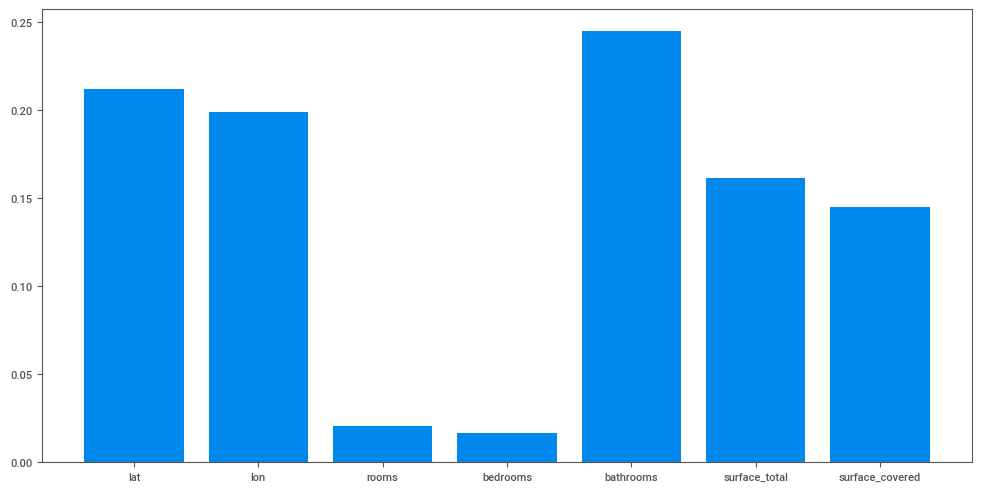

In [29]:
feat_impo = tree.feature_importances_
plt.figure(figsize=(12,6))
plt.bar(x = X_train.columns, height = feat_impo)

De este arbol nos damos cuenta que su variable mas importante fue el numero de baños, seguido muy de cerca por la latitud y longitud del inmueble

In [30]:
y = df.price.copy()
X = df.drop(columns = 'price').copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train = scaled_pipeline(X_train)
X_test = scaled_pipeline(X_test)

knr = KNeighborsRegressor(n_neighbors = 25, weights = 'distance')
knr.fit(X_train, y_train)
y_pred = knr.predict(X_test)
r2_score(y_test, y_pred)

0.7159049864566838

Nuestro KNN weighted nunca ha decepcionado, piensa muy similar ha como lo hacemos nosotros, por medio de asociacion y debido a que fue con un data set normalizado, tuvo un mejor desempeño sin mucho trabajo.

## Acerca de las predicciones:
Las predicciones para nuestro modelo del sprint 2, resultaron peores que nuestras mediciones del modelo Sprint 1, presuntamente porque estamos tratando con datos un poco mas reales, con menos informacion, la necesidad de rescatar informacion y reemplazar valores agrega parte de error no importa que tan bien se haga.

Sin embargo vamos a ver como responde nuestro modelo al simplemente eliminar nuestras columnas con datos faltantes:

Eliminar los rows de datos con NA seria trampa, porque hay que garantizar que se realizen predicciones incluso para datos con espacios faltantes.

In [31]:
y = df.price.copy()
X = df.drop(columns = 'price').copy()
X.drop(columns = ['l3','property_type'], inplace = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [32]:
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean())
ss_1 = StandardScaler()
X_train = ss_1.fit_transform(X_train)
X_test = ss_1.transform(X_test)

In [33]:
tree_2 = DecisionTreeRegressor(max_depth = 15)
tree_2.fit(X_train, y_train)
y_pred = tree_2.predict(X_test)
r2_score(y_test, y_pred)

0.5932153956135614

In [34]:
knr = KNeighborsRegressor(n_neighbors = 25, weights = 'distance')
knr.fit(X_train, y_train)
y_pred = knr.predict(X_test)
r2_score(y_test, y_pred)

0.6856328127373401

Despues de un sencillo preprocesamiento los datos predictivos del arbol de decision son mejores, sin embargo empeoro nuestro knn regresor, parece que valio la pena el preprocesamiento realizado. La ingenieria de datos en muchos casos es de trial and error.

Generalmente el arbol de decision funciona mejor para un numero pequeño de variables predictoras, puede ser uno de los factores por los cuales se obtuvieron mejores resultados que en el preprocesamiento anterior.

## Modelos avanzados.
Vamos a probar primero con un arbol de decision:

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
y = df.price.copy()
X = df.drop(columns = 'price').copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_test = simple_pipeline(X_test)
X_train = simple_pipeline(X_train)

rfr = RandomForestRegressor()

rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
r2_score(y_test, y_pred)

0.7250313275582302

Nada mal para un modelo sin tunning sin embargo, tuvo peor performance que nuestro KNN weighted.

In [37]:
y = df.price.copy()
X = df.drop(columns = 'price').copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_test = scaled_pipeline(X_test)
X_train = scaled_pipeline(X_train)

rfr = RandomForestRegressor(n_estimators = 50)
params = {'max_depth': [x for x in np.arange(1,25,1)],
         'max_features': ['auto','log2']}

rfr_opt = RandomizedSearchCV(estimator = rfr, param_distributions = params, n_iter = 20,
                                cv = 4, scoring = 'r2', random_state=42, n_jobs = -1)

rfr_opt.fit(X_train, y_train)
y_pred = rfr_opt.predict(X_test)
r2_score(y_test, y_pred)

0.7396893101881264

Despues de optimizar nuestro arbol de decision obtenemos unos muy buenos resultados. Nuestro R2 mejoro 0.03 ptos.
Ahora vamos a ver como estan distribuidas la importancia de nuestras variables.

<BarContainer object of 7 artists>

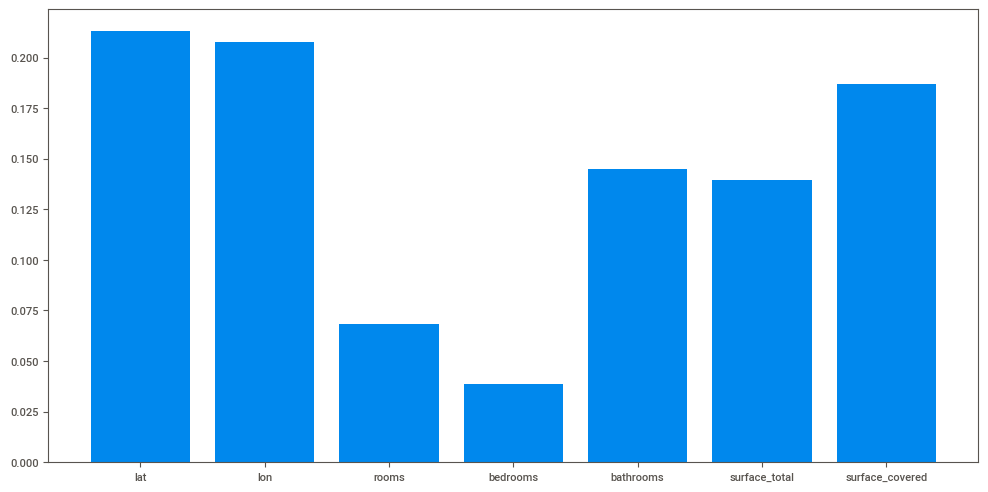

In [38]:
best_est = rfr_opt.best_estimator_
feat_impo = best_est.feature_importances_
plt.figure(figsize=(12,6))
plt.bar(x = X_train.columns, height = feat_impo)

De nuevo la localizacion parece ser muy importante, la combinacion de nuestros atributos de longitud y latitud se llevan la corona, seguido de la superficie cubierta, nuestro arbol hace uso de la sabiduria de las masas.
Ahora observemos la importancia en los dos primeros arboles de nuestro bosque.

<BarContainer object of 7 artists>

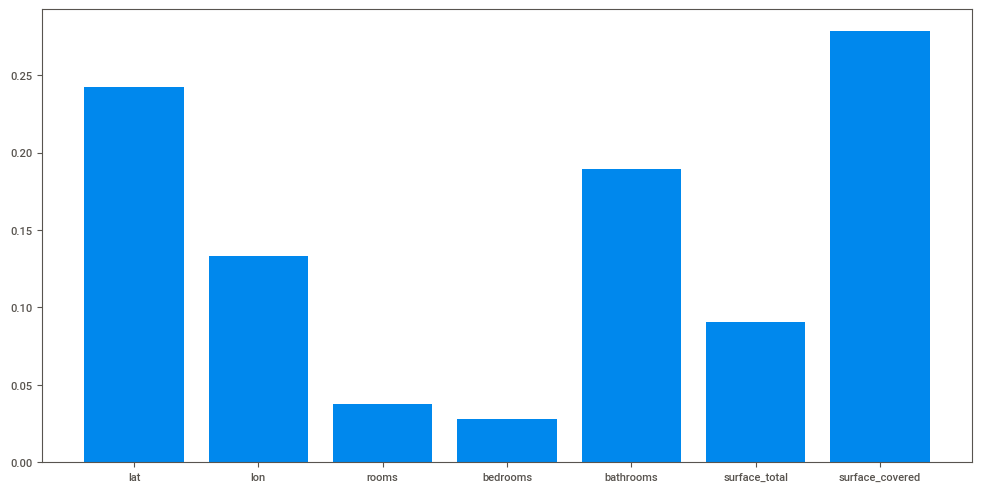

In [39]:
best_est = rfr_opt.best_estimator_
feat_impo = best_est.estimators_[0].feature_importances_
plt.figure(figsize=(12,6))
plt.bar(x = X_train.columns, height = feat_impo)

Este arbol le da bastante importancia a la longitud, y la da mas importancia a las salas de lo normal.

<BarContainer object of 7 artists>

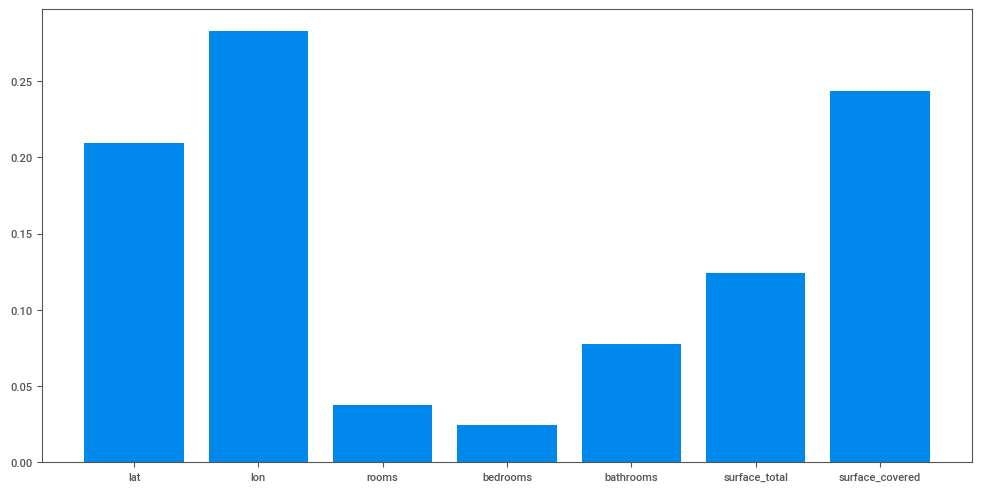

In [40]:
best_est = rfr_opt.best_estimator_
feat_impo = best_est.estimators_[1].feature_importances_
plt.figure(figsize=(12,6))
plt.bar(x = X_train.columns, height = feat_impo)

A este arbol le importa bastante la superficie, y no le interesan las salas.

In [41]:
print("Mejores parametros: "+str(rfr_opt.best_params_))
print("Mejor Score: "+str(rfr_opt.best_score_))

Mejores parametros: {'max_features': 'log2', 'max_depth': 22}
Mejor Score: 0.6623486548610836


Este es el resultado sobre los Split del train, los atributos ganadores fueron arboles de max_depth = 23 con max_features = log2.

In [42]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

Vamos a probar como nos va con otro modelo avanzado, en este caso una regresion lasso combinada con la generacion de atributos polinomicos, para esta tarea hacemos nuestra trasnformacion con el pipeline polinomico.

In [43]:
y = df.price.copy()
X = df.drop(columns = 'price').copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_test = polinomial_pipeline(X_test, 2)
X_train = polinomial_pipeline(X_train, 2)

lasso = linear_model.Lasso()

lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
r2_score(y_test, y_pred)

0.2966729080390561

Los resultados son desalentadores en nuestro modelo bruto, probablemente no fue la mejor idea, sin embargo vamos a ver como cambia todo con un poco de optimizacion.

In [44]:
y = df.price.copy()
X = df.drop(columns = 'price').copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_test = polinomial_pipeline(X_test, 2)
X_train = polinomial_pipeline(X_train, 2)

lasso = linear_model.Lasso()
params = {'alpha': [x for x in np.array([35, 20, 10, 1, 0.5, 0.1])]}

lasso_opt = GridSearchCV(estimator = lasso, param_grid = params, cv = 4, scoring = 'r2', n_jobs = -1)

lasso_opt.fit(X_train, y_train)
y_pred = lasso_opt.predict(X_test)
r2_score(y_test, y_pred)

0.2966631127979197

Lamentablemente obtenemos resultados muy similares. La optimizacion no cambio casi nada los results, y eso que tuvimos en cuenta un intervalo amplio de alpha.

In [45]:
print("Mejores parametros: "+str(lasso_opt.best_params_))
print("Mejor Score: "+str(lasso_opt.best_score_))

Mejores parametros: {'alpha': 35.0}
Mejor Score: 0.2524902242327396


Aqui notamos que si bien alpha cambio bastante, los resultados no mucho. No parece ser una tarea facil para la transformacion polinomica.

Ahora observamos la importancia de los features en nuestra regresion, vamos a ver si se alinean con los arboles y el bosque.

In [46]:
y = df.price.copy()
X = df.drop(columns = 'price').copy()
X = simple_pipeline(X)

In [47]:
poly = PolynomialFeatures(2, include_bias = False)
poly.fit(X)


PolynomialFeatures(include_bias=False)

<BarContainer object of 35 artists>

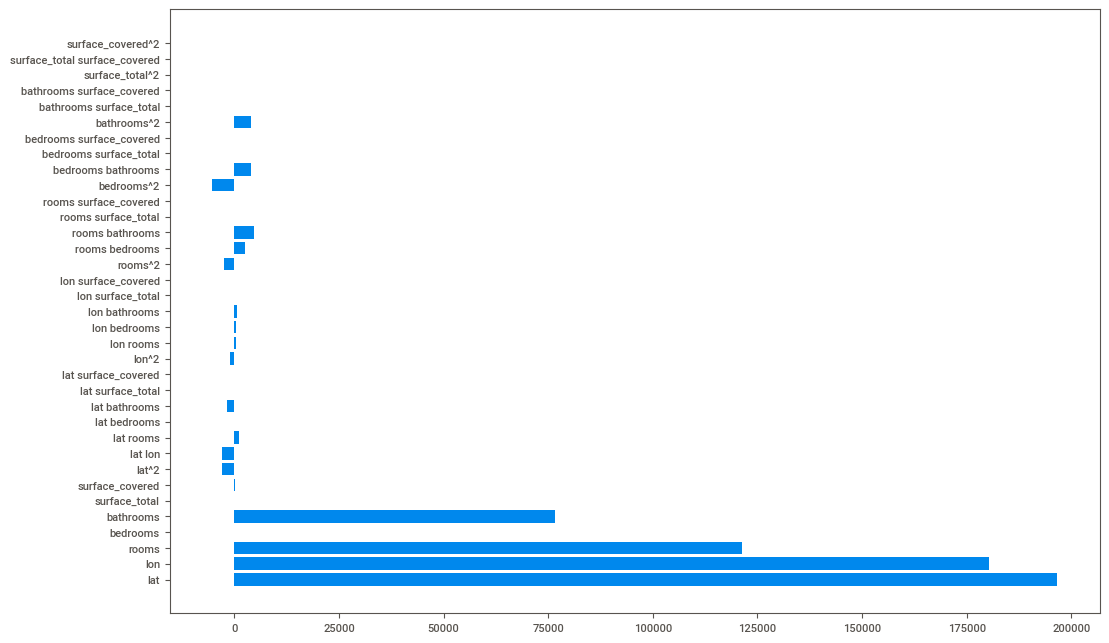

In [48]:
best_est = lasso_opt.best_estimator_
feat_impo = best_est.coef_
plt.figure(figsize=(12,8))
plt.barh(y = poly.get_feature_names(X.columns), width = feat_impo)

Observamos que tambien la regresion piensa que la ubicacion es muy importante, vemos como disminuye la importancia en las potencias, no parecen ser buenos predictores, es por eso que salio tan mal los resultados, significa que la regression, fue muy similar a una regresion lineal.

## Analisis de Errores

Concluimos que nuestro ganador fue nuestro bosque aleatorio. Ahora vamos a ver mas de cerca los errores de este.

In [49]:
y = df.price.copy()
X = df.drop(columns = 'price').copy()
X = scaled_pipeline(X)
X['Price'] = y
X['Absolute_error'] = abs(X['Price'] - rfr_opt.predict(X.drop(columns = 'Price')))

Calculamos los errores absolutos para ver con que se relacionan.

<AxesSubplot:>

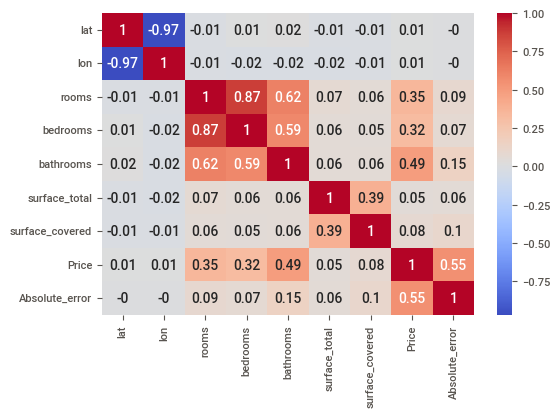

In [50]:
sns.heatmap(X.corr().round(2), annot = True, cmap = 'coolwarm')

<AxesSubplot:xlabel='Price', ylabel='Absolute_error'>

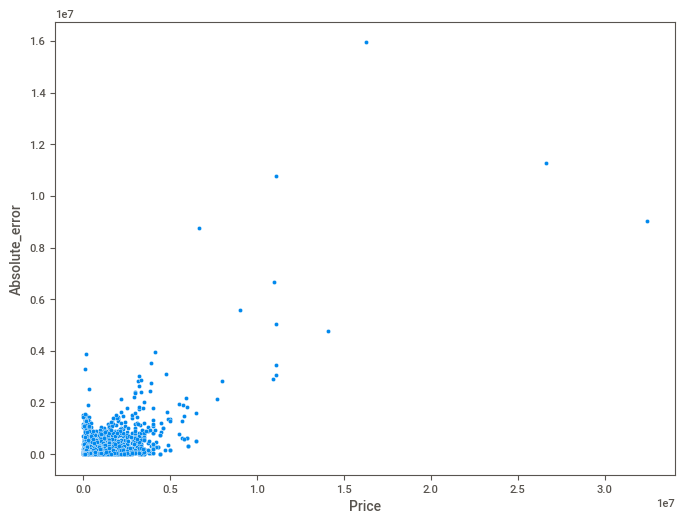

In [51]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = X.Price, y = X.Absolute_error)

Observamos que tienen una fuerte relacion con el precio, no es de sorprender, es mas facil fallar en terminos absolutos para casas con mayores precios. Sin embargo vemos como el numero de baños tambien guarda una leve relacion con los errores, tal vez porque tambien una propiedad con un mayor numero de baños es mas probable que tenga un mayor precio.
Vamos a observar los errores relativos.

<AxesSubplot:>

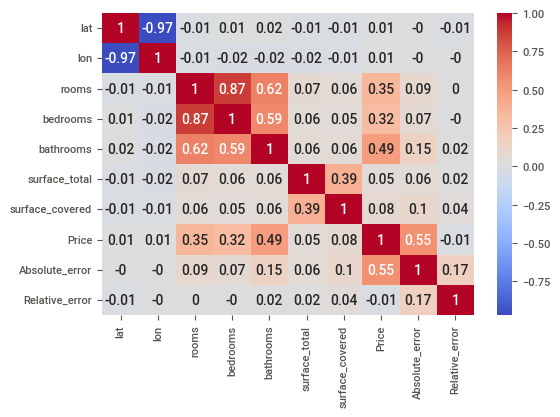

In [52]:
X['Relative_error'] = X['Absolute_error'] / X['Price']
sns.heatmap(X.corr().round(2), annot = True, cmap = 'coolwarm')

Observamos que con la variable que mayor relacion guarda es surface_covered, esta es una variable complicada, por que si bien la la superficie cubierta seria buen predictor del precio, depende mucho de su calidad, es sorprendete que en la regresion polinomica no haya habido fuerte relacion de la combinacion de baños con superficie cubierta, a simple vista parece ser buen predictor.
Vamos a ver la relacion de surface_covered con price mas a fondo.

<AxesSubplot:xlabel='surface_covered', ylabel='Relative_error'>

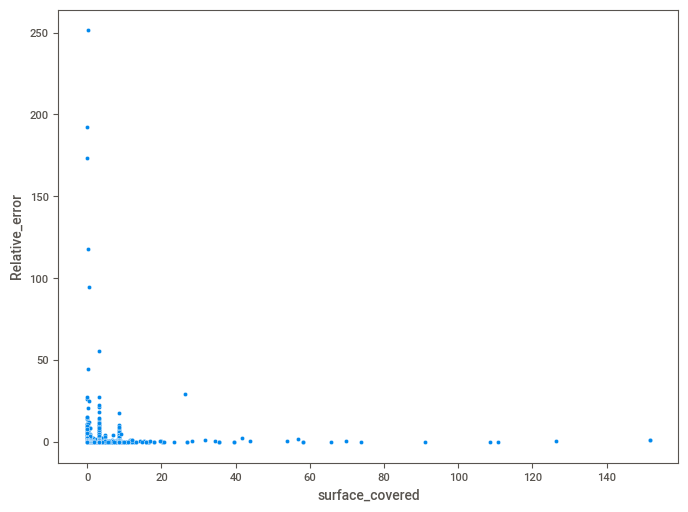

In [53]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = X.surface_covered, y = X.Relative_error)

Muy dificil encontrar una tendencia significativa,sin embargo parece que las propiedades que unicamente son propensas a altos errores relativos son aquellas con baja superficie cubierta. Especialmente cercana a 0. Vamos a verlas mas a fondo

<AxesSubplot:xlabel='surface_covered', ylabel='Relative_error'>

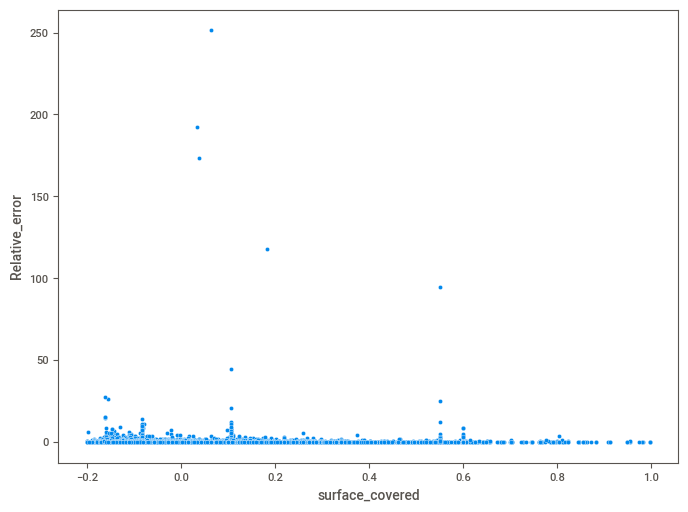

In [54]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = X[(X['surface_covered'] > -1) & (X['surface_covered'] < 1)].surface_covered, y = X.Relative_error)

Probablemente el modelo podria ser mejorado eliminando outliers de surface_covered, parece ser que la distribucion esta con sesgo. Sin embargo hasta aqui va esta entrega.

## Conclusiones

 - La ubicacion es clave para establecer el precio de las viviendas en Buenos Aires, el algoritmo puede ser mejorado si se hace una mejor abstraccion de esta dimension.
 - El modelo KNN weighted parece ser un muy buen predictor cuando se conoce poco del dataset, y del negocio. Cuando es puesto en marcha hace uso del poder de la asociacion para dar resultados solidos.
 - Es importante conocer la distribucion de los atributos para hacer buenas trasnformaciones de los datos, muchas veces algunas variables son transformadas con sesgos
 - Aunque el atributo de baños parecia muy importante con el coeficiente de correlacion, observamos que casi todos los modelos le daban poca importancia porque su significado esta implicito en otras variables.
 - Garantizar un buen numero de variables independientes predictoras es clave para realizar una buena prediccion, hay que garantizar un buen grado de interdependencia.
 - En este caso el mejor modelo predictor fue el bosque aleatorio porque hizo uso de multiples arboles que minimizaban el bias de los arboles

## Clustering

Vamos a agrupar nuestros datos haciendo uso de modelos de clustering. Para ello traemos nuestros datos sin la etiqueta del precio, despues los vamos a reducir a dos dimensiones para mejor visualizacion y por ultimo vamos a ver que tan bien se relaciona la clasificacion con su precio final.

Como no conocemos mucho del dataset, ni como se agrupan los datos, vamos a usar una tecnica de clustering de uso general, en este caso Kmeans.

In [55]:
from sklearn.cluster import KMeans

y = df.price.copy()
X = df.drop(columns = 'price').copy()
X = scaled_pipeline(X)

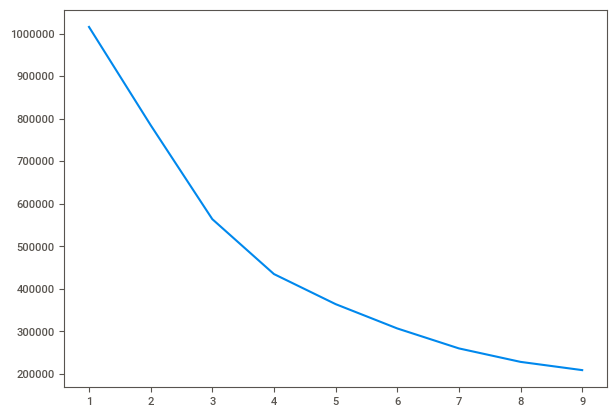

In [57]:
n_clusters = np.arange(1,10)
results = np.zeros(len(n_clusters))

for i in n_clusters:
    model_k = KMeans(i)
    model_k.fit(X)
    results[i-1] = model_k.inertia_

plt.figure(figsize=(7,5))
plt.plot(n_clusters, results)


Parece ser que el punto de codo esta localizado en el numero de clusters de 4. Vamos a irnos con este valor para asignar nuestros clusteres. De paso vamos a reducir la dimensionalidad de nuestros datos con SVD debido a que nuestros datos ya estan escalados.

In [68]:
from sklearn.decomposition import PCA

model_k = KMeans(4)
dim_reductor = PCA(2, random_state= 42)
transformed_df = pd.DataFrame(dim_reductor.fit_transform(X), columns = ['Dim_1', 'Dim_2'])
transformed_df['labels'] = model_k.fit_predict(X)

<AxesSubplot:xlabel='Dim_1', ylabel='Dim_2'>

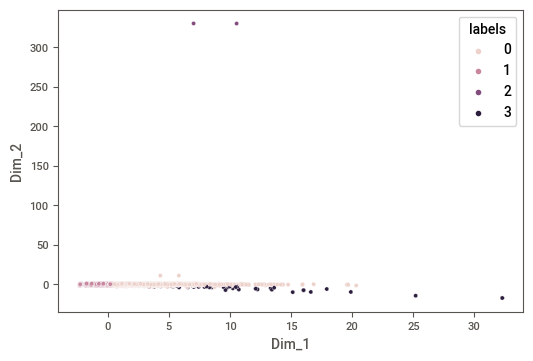

In [69]:
sns.scatterplot(x = 'Dim_1', y = 'Dim_2', hue = 'labels', data = transformed_df)

Eliminamos los labels numero 2 debido a que nos damos cuenta que son outliers en la dimension #2, no nos dejan ver claramente las variaciones.

<AxesSubplot:xlabel='Dim_1', ylabel='Dim_2'>

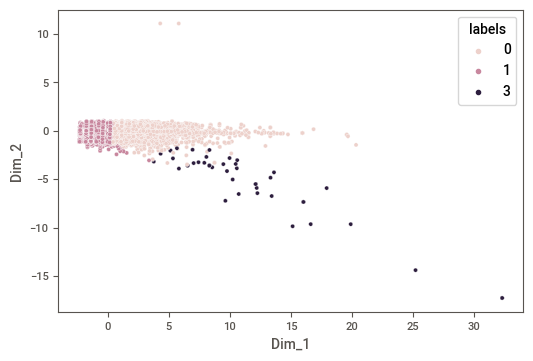

In [72]:
sns.scatterplot(x = 'Dim_1', y = 'Dim_2', hue = 'labels', data = transformed_df.drop(transformed_df[transformed_df['labels'] == 2].index))

<BarContainer object of 7 artists>

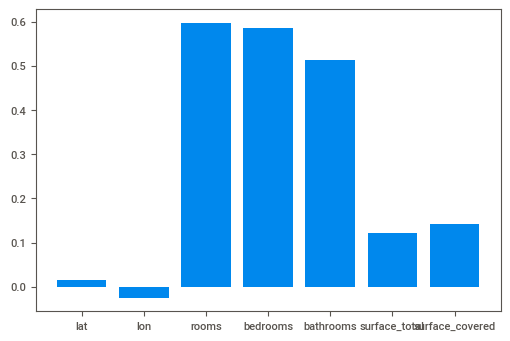

In [66]:
plt.bar(x = X.columns, height = dim_reductor.components_[0])


La dimension 1 representa el "tamaño de la propiedad"

<BarContainer object of 7 artists>

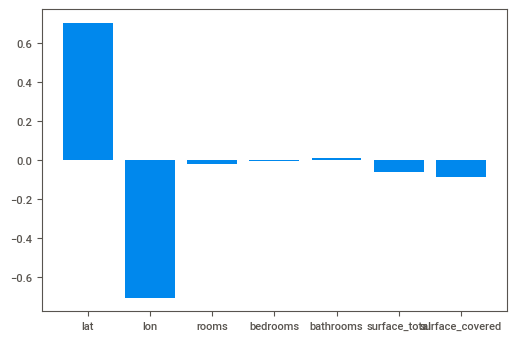

In [67]:
plt.bar(x = X.columns, height = dim_reductor.components_[1])

La dimension 2 representa la ubicacion de la propiedad, esto confirma nuestras sospechas de las principales diferencias entre las propiedades.

Nos damos cuenta que la principal diferencia entre los grupos es: El tamaño de la propiedad y en segundo lugar la ubicacion, lo que realmente diferencia los grupos es lo primero. Ahora vamos a ver como juega el tema del precio!.

<AxesSubplot:xlabel='Dim_1', ylabel='Dim_2'>

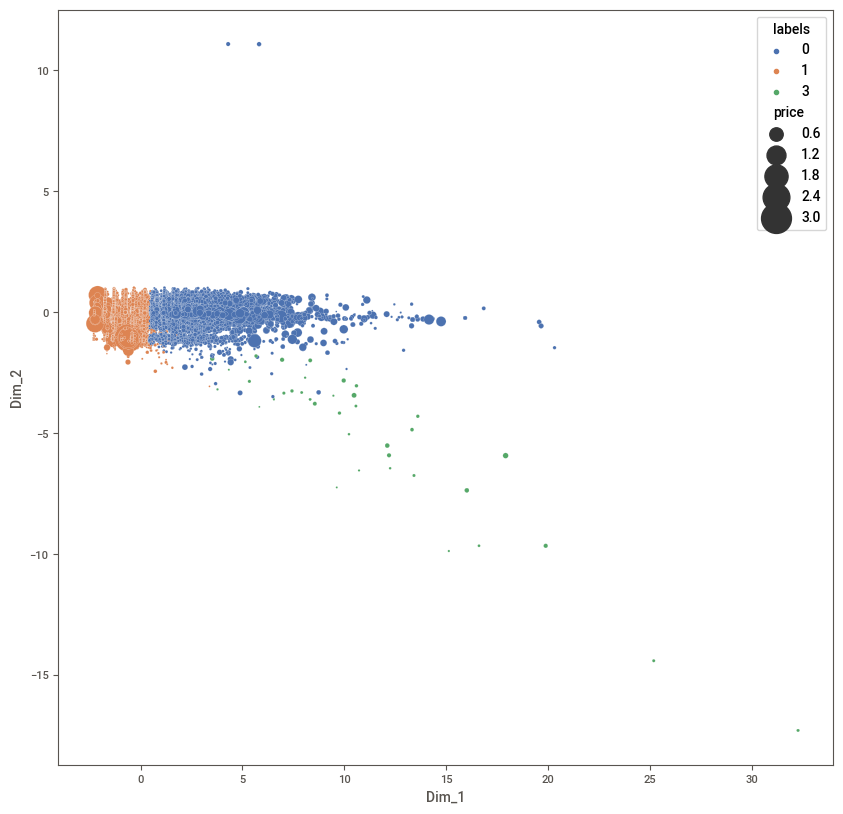

In [76]:
transformed_df['price'] = y
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'Dim_1', y = 'Dim_2', hue = 'labels', size = 'price', data = transformed_df.drop(transformed_df[transformed_df['labels'] == 2].index), palette= 'deep', sizes=(1, 500))

Observamos que las propiedades mas costosas no son las mas grandes, en promedio si hay correlacion entre el tamaño con el precio, sin embargo, las propiedades de mayor valor parecen estar ubicadas en longitudes positivas y latitudes negativas, posiblemente cercana a la costa y los centros de comercio en Buenos Aires.